<a href="https://colab.research.google.com/github/sadhubby/CSINTSY-MCO/blob/main/reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Brief Description of the Dataset:**

The data set that will be used is the World University Rankings by Myles O' Niel. The data gathered was based on Times Higher World Educational Ranking, Academic Ranking of World Universities, and The Center of World University Rankings. The dataset aims to find out which university in the world is the best in terms of quality of education, quality of facilities, alumni employment, quality of faculty, publication, influence, citations, broad impact, and patents which will then be given an overall score based on those metrics.

**Data Collection Process:**

The data collection process for building the dataset used in world university rankings involves compiling a curated list of journals across 23 broad fields, counting articles published in these journals over a period from Y-2 to Y-11, where Y is the current year, and using a PageRank-type algorithm to assign weighted citations excluding self-citations. Faculty and alumni distinctions are identified based on awards from reputable organizations, with points assigned according to the time since the award and their association with the university. Data on alumni holding top positions in the world's largest 2000 public companies is also collected, cross-referencing company data to identify executives and leaders who are university alumni. The data is aggregated, and universities are scored based on a weighted combination of indicators, including research output, high-quality publications, influence, citations, faculty distinctions, and employability, ensuring a comprehensive and balanced assessment.

**Structure of the Dataset:**

The dataset is represented as a table with each row representing a unique university and each column representing different attributes or indicators related to the university's performance or rank. The dataset includes several key variables such as university name, country, ranking, scores for teaching, research, citations, industry income, and international outlook. There are a total of 1,527 observations (universities) and 14 variables in the dataset.

**VARIABLE DESCRIPTIONS**

1. **world_rank** - This variable is numerical ordinal as it pertains to the ranking based on the Center for World University Rankings (CWUR) standards. These standards involve: 1) education, 2) employability, 3) faculty, 4) research.
2. **institution** - This variable involves the name of the university. This is an identifying variable that encompasses the multiple variables.
3. **country** - This variables involves the country where the institution is located and is also an identifying variable that is used to differentiate same-name institutions by adding the country.
4. **national_rank** - This variable is numerical ordinal and it refers to the rank of the educational institution within its country.
5. **quality_of_education** - This variable is a numerical ranking based on the measurement of the quality of education the university has based on weighted number of a university’s alumni who have received top academic distinctions relative to the university’s size.
6. **alumni_employment** -This variable is a numerical ranking based on the measurement of  the weighted average number annualy of a university’s alumni who have held top positions since 2011 at the world’s largest 2000 public companies relative to the university’s size.
7. **quality_of_faculty** - This variable is a numerical ranking based on the measurement of the quality of faculty based on the weighted number of faculty members who have received top academic distinctions.
8. **publications** - This variable is a numerical ranking based on the measurement of high-quality publications based on the PageRank algorithm.
9. **influence** - this variable is a numerical ranking based on the number of articles published in educational journals.  
10. **citations** - This variable is a numerical ranking based on the number of cited articles published by the university.
11. **broad_impact** - This variable is a measurement of the impact the university has on the various academic and it is based on the several factors like citations and publications.
12. **patents** - This variable is the number of patents registered under the university or its faculty.
13. **score** - This variable is the score from 0 to 100 that takes into account the standards of Center of World University Rankings (CWUR).
14. **year** - This variable is the year relevant to the annual world ranking.


##**Data Cleaning:**

**IMPORTING ALL THE NEEDED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd

**READING THE DATASET**

In [ ]:
rankings_df = pd.read_csv("cwurData.csv")

In [ ]:
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


**FILTERING THE DATASET TO ONLY SHOW RANKINGS FROM 2015**

The researchers would only want to use the data from the most recent year as it is the most relevant for current times.

In [ ]:
rankings_df_copy = rankings_df
rankings_df_copy = rankings_df.drop(rankings_df[rankings_df['year'] != 2015].index)
rankings_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1200 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            1000 non-null   int64  
 1   institution           1000 non-null   object 
 2   country               1000 non-null   object 
 3   national_rank         1000 non-null   int64  
 4   quality_of_education  1000 non-null   int64  
 5   alumni_employment     1000 non-null   int64  
 6   quality_of_faculty    1000 non-null   int64  
 7   publications          1000 non-null   int64  
 8   influence             1000 non-null   int64  
 9   citations             1000 non-null   int64  
 10  broad_impact          1000 non-null   float64
 11  patents               1000 non-null   int64  
 12  score                 1000 non-null   float64
 13  year                  1000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 109.5+ KB


**CHECKING DATATYPES AND FORMATTING**

In [ ]:
rankings_df_copy.dtypes

,0
world_rank,int64
institution,object
country,object
national_rank,int64
quality_of_education,int64
alumni_employment,int64
quality_of_faculty,int64
publications,int64
influence,int64
citations,int64


As only "world_rank" and "instutition" have the data type of object which is the default data type of strings in pandas, there are no incorrect datatypes and the formatting is consistent.

**CHECK IF ANY UNIVERISITES WERE DUPLICATED**

In [ ]:
rankings_df_copy['institution'].drop_duplicates()

,institution
1200,Harvard University
1201,Stanford University
1202,Massachusetts Institute of Technology
1203,University of Cambridge
1204,University of Oxford
1205,Columbia University
1206,"University of California, Berkeley"
1207,University of Chicago
1208,Princeton University
1209,Cornell University


In [ ]:
rankings_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1200 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            1000 non-null   int64  
 1   institution           1000 non-null   object 
 2   country               1000 non-null   object 
 3   national_rank         1000 non-null   int64  
 4   quality_of_education  1000 non-null   int64  
 5   alumni_employment     1000 non-null   int64  
 6   quality_of_faculty    1000 non-null   int64  
 7   publications          1000 non-null   int64  
 8   influence             1000 non-null   int64  
 9   citations             1000 non-null   int64  
 10  broad_impact          1000 non-null   float64
 11  patents               1000 non-null   int64  
 12  score                 1000 non-null   float64
 13  year                  1000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 109.5+ KB


**CHECKING IF ANY VARIABLE IS NULL**

In [ ]:
rankings_df_copy.isnull().any()

,0
world_rank,False
institution,False
country,False
national_rank,False
quality_of_education,False
alumni_employment,False
quality_of_faculty,False
publications,False
influence,False
citations,False


The data set no longer needs to be cleaned as there are no more duplicates or null variables.

##**Exploratory Data Analysis**

**Importing more libraries:**



In [ ]:
import matplotlib.pyplot as plt

**What is the number of countries present in the dataset in 2015?**

Numerical Summary - Number of Countries in the dataset in 2015
country
USA                     229
China                    83
Japan                    74
United Kingdom           65
Germany                  55
France                   49
Italy                    47
Spain                    40
South Korea              36
Canada                   33
Australia                27
Taiwan                   21
Brazil                   18
India                    16
Netherlands              13
Austria                  12
Sweden                   11
Belgium                  10
Turkey                   10
Poland                    9
Finland                   9
Switzerland               9
Iran                      8
Ireland                   8
Greece                    7
Portugal                  7
Israel                    7
Hungary                   6
Hong Kong                 6
New Zealand               6
Czech Republic            5
South Africa              5
Norway                    5
Denma

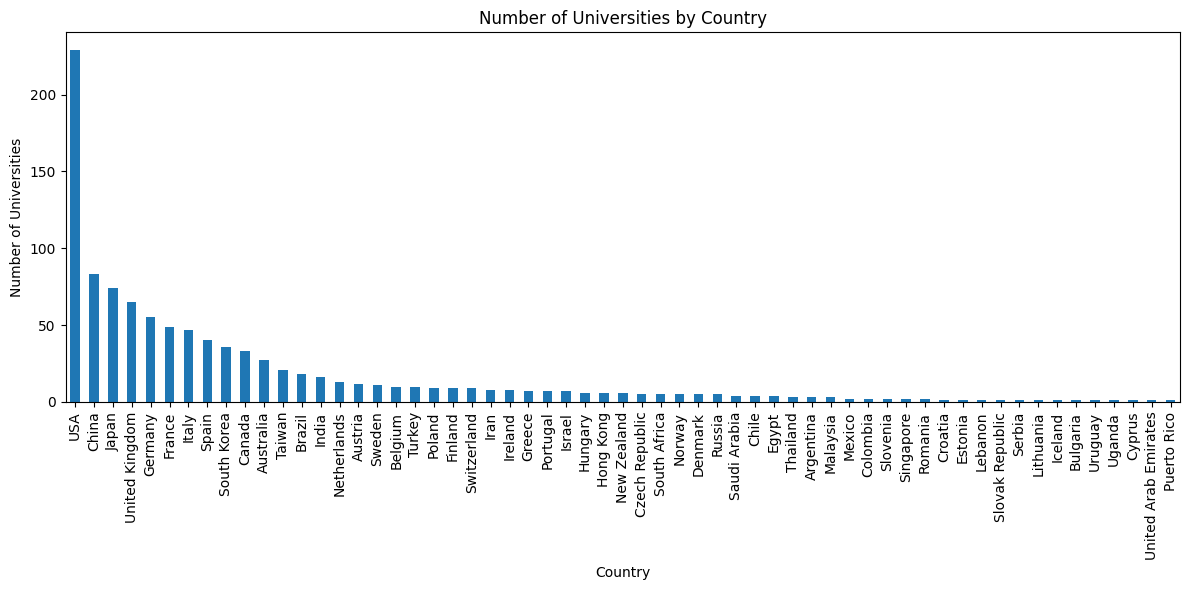

In [ ]:
country_counts = rankings_df_copy['country'].value_counts()

print("Numerical Summary - Number of Countries in the dataset in 2015")
print(rankings_df_copy['country'].value_counts())

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.title('Number of Universities by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Which countries have the highest concentration of top-ranked universities (world_rank <= 100) in 2015?**

Numerical Summary - Top Universities (Rank <= 100) in 2015:
country
USA               55
Japan              7
United Kingdom     7
Switzerland        4
France             4
Israel             3
Canada             3
Netherlands        2
Australia          2
China              2
South Korea        2
Germany            2
Belgium            1
Taiwan             1
Denmark            1
Sweden             1
Singapore          1
Russia             1
Norway             1
Name: count, dtype: int64


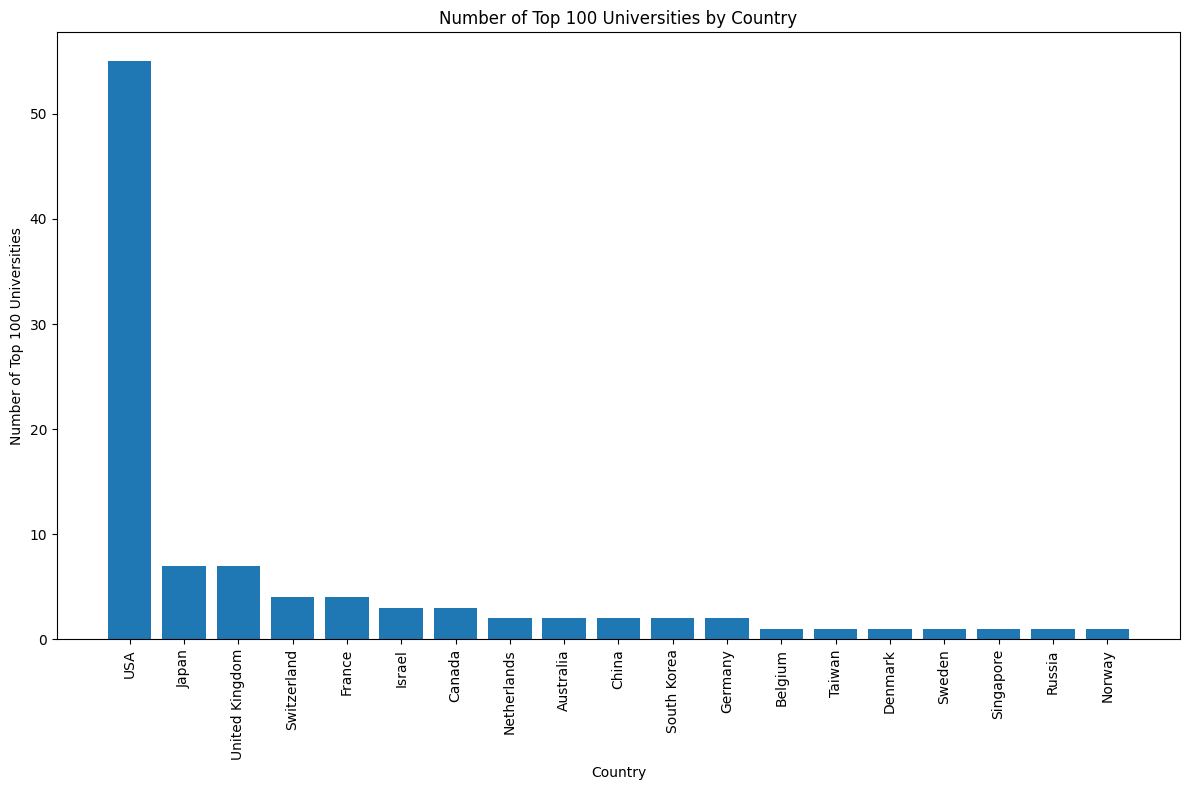

In [ ]:
value_counts = (rankings_df_copy['world_rank'] <= 100).value_counts()
top_100_df = rankings_df_copy[rankings_df_copy['world_rank'] <= 100]
top_countries = top_100_df['country'].value_counts()
top_countries = top_countries.sort_values(ascending=False)

print("Numerical Summary - Top Universities (Rank <= 100) in 2015:")
print(top_countries)

plt.figure(figsize=(12, 8))

plt.bar(top_countries.index, top_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Top 100 Universities")
plt.title("Number of Top 100 Universities by Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**What is the number of citations per country in 2015?**

<ipython-input-14-acf7cb84da43>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='country', y='citations', data=rankings_df_copy, palette='Set2')


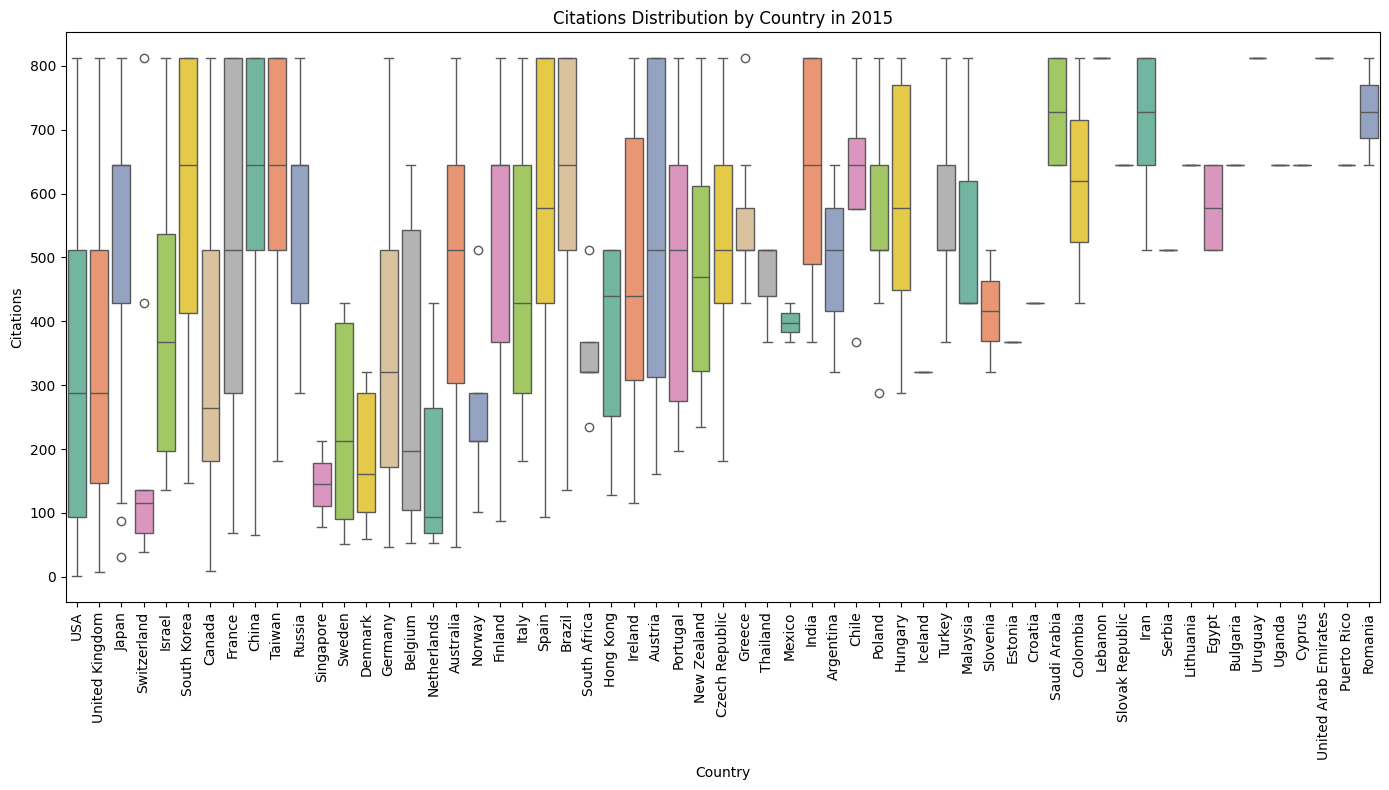

Numerical Summaries by Country (Reordered to Match Boxplot):
                 country        mean  median   mode    min    max  range  \
0                    USA  320.803493   287.0  511.0    1.0  812.0  811.0   
1         United Kingdom  350.892308   287.0  511.0    7.0  812.0  805.0   
2                  Japan  538.486486   645.0  645.0   31.0  812.0  781.0   
3            Switzerland  205.000000   115.0   39.0   39.0  812.0  773.0   
4                 Israel  397.714286   368.0  136.0  136.0  812.0  676.0   
5            South Korea  594.055556   645.0  812.0  146.0  812.0  666.0   
6                 Canada  342.878788   264.0  511.0    9.0  812.0  803.0   
7                 France  516.163265   511.0  812.0   68.0  812.0  744.0   
8                  China  624.855422   645.0  812.0   65.0  812.0  747.0   
9                 Taiwan  656.285714   645.0  812.0  182.0  812.0  630.0   
10                Russia  563.400000   645.0  645.0  287.0  812.0  525.0   
11             Singapore  1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_citations = rankings_df_copy.groupby('country')['citations'].sum().reset_index()
total_citations = total_citations.rename(columns={'citations': 'total_citations'})

numerical_summaries = rankings_df_copy.groupby('country')['citations'].agg(
    mean='mean',
    median='median',
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    min='min',
    max='max',
    range=lambda x: x.max() - x.min(),
    variance='var',
    std_dev='std',
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)
).reset_index()

numerical_summaries = pd.merge(numerical_summaries, total_citations, on='country')

numerical_summaries = numerical_summaries.dropna()

plt.figure(figsize=(14, 8))
boxplot = sns.boxplot(x='country', y='citations', data=rankings_df_copy, palette='Set2')
plt.xlabel('Country')
plt.ylabel('Citations')
plt.title('Citations Distribution by Country in 2015')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

order = [label.get_text() for label in boxplot.get_xticklabels()]

numerical_summaries = numerical_summaries.set_index('country').reindex(order).reset_index()

print("Numerical Summaries by Country (Reordered to Match Boxplot):")
print(numerical_summaries)

**Is there a correlation between a university's overall score and its scores in individual categories for the year 2015?**

Correlation Coefficients with Overall Score (2015):
quality_of_education    0.595771
alumni_employment       0.480756
quality_of_faculty      0.708048
publications            0.521738
influence               0.522732
citations               0.517301
broad_impact            0.527617
patents                 0.454706
Name: score, dtype: float64


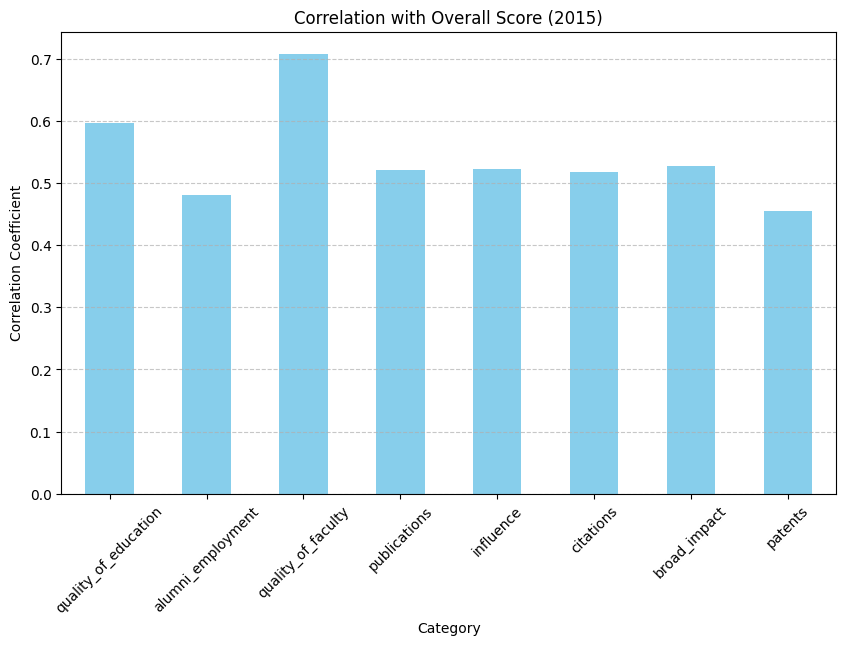

In [ ]:
rankings_df_2015 = rankings_df_copy

columns_of_interest = ['score', 'quality_of_education', 'alumni_employment', 'quality_of_faculty',
                       'publications', 'influence', 'citations', 'broad_impact', 'patents']

df_subset_2015 = rankings_df_2015[columns_of_interest]

df_subset_2015_inverse = df_subset_2015.copy()
df_subset_2015_inverse[columns_of_interest[1:]] = df_subset_2015[columns_of_interest[1:]].apply(lambda x: max(x) + 1 - x)

correlations = df_subset_2015_inverse.corr()['score'].drop('score')

print("Correlation Coefficients with Overall Score (2015):")
print(correlations)

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation with Overall Score (2015)')
plt.xlabel('Category')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Research Question:**

*Does the country where a university is located affect the amount of citations it garners?*

Based on the exploratory data analysis, the researchers have noticed that the number of universities in a country does not always indicate a higher number of citations garnered. For example, Netherlands is ranked 32nd in 2015 based on the number of citations recieved despite ranking 15th in the number of universities that year. The researchers would like to know whether or not the country a university is located at relates with the amount of citations it garners. This is important as citations are usually a key metric in measuring the influence and visibility of an academic research. Understanding how location affects citations can help identify regional disparities in academic recognition and influence. If geographic location significantly affects citation counts, there needs to be an effort to support the universities and researchers in these areas.




**Data Modeling:**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [ ]:
rankings_df_2015_copy = rankings_df_2015
X = rankings_df_2015[['citations', 'country']]
encoder = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('encoder', encoder, ['country']),
    ('scaler', scaler, ['citations'])
])

pipeline = make_pipeline(preprocessor, KMeans(n_clusters=3, random_state=10, n_init=10))

pipeline.fit(X)

rankings_df_2015_copy['cluster'] = pipeline.named_steps['kmeans'].labels_

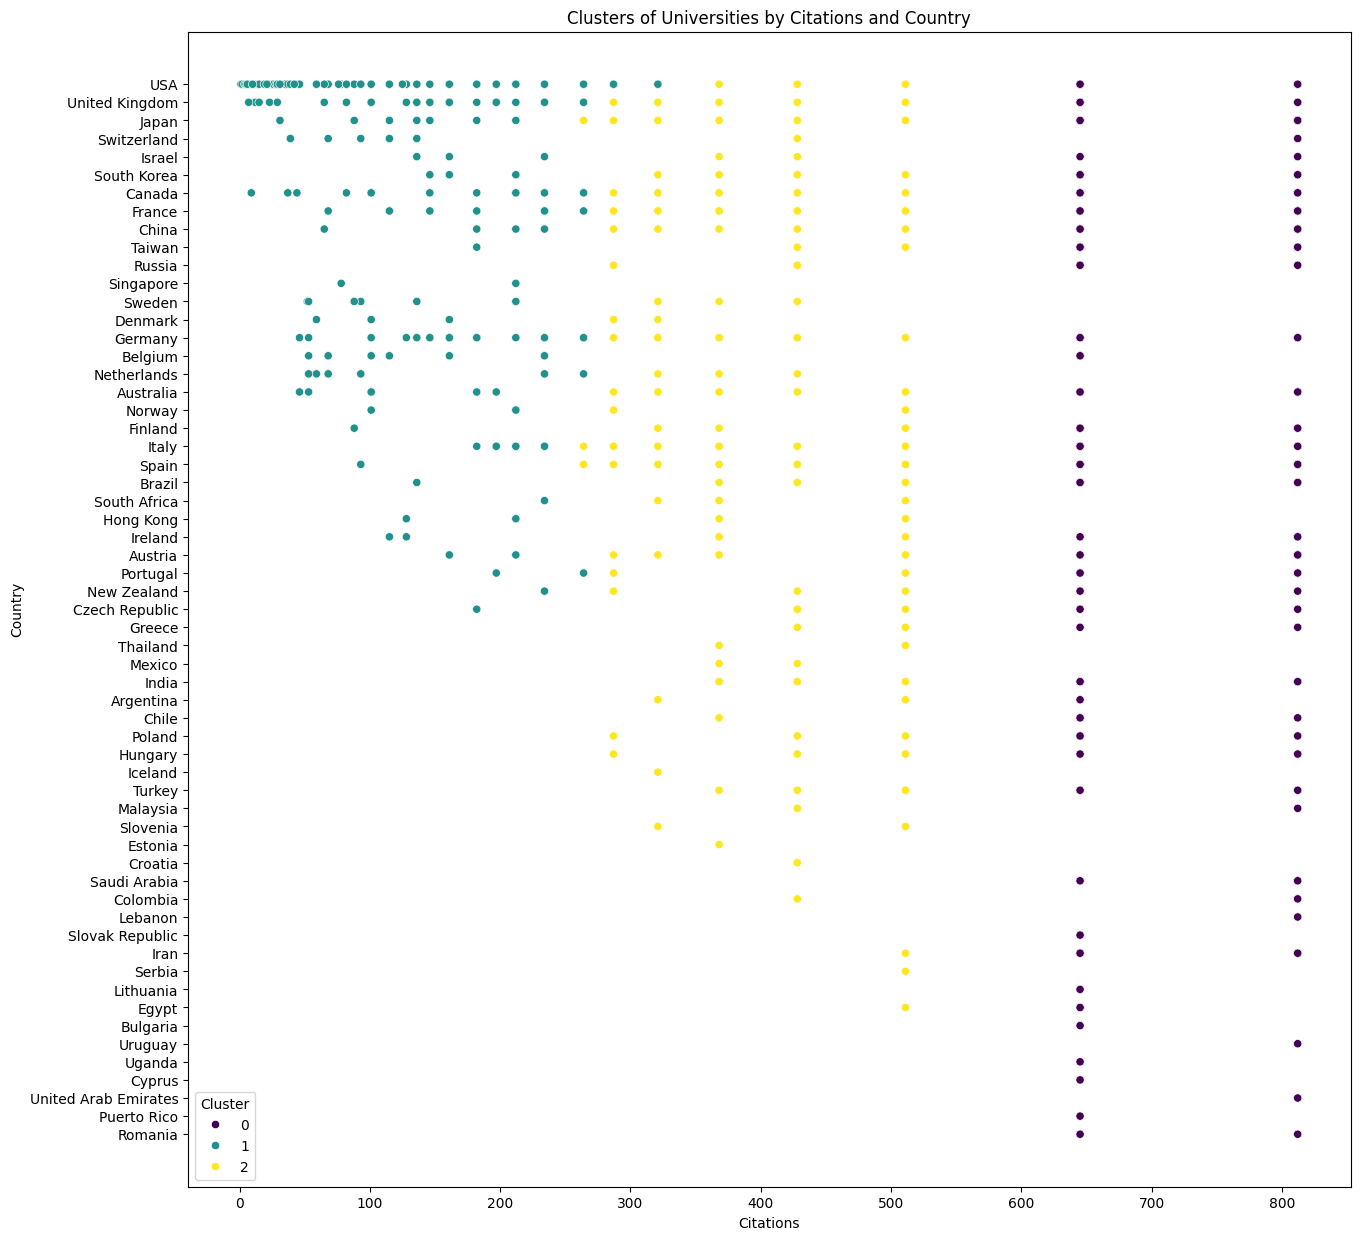

In [ ]:
plt.figure(figsize=(15, 15))

sns.scatterplot(data=rankings_df_2015_copy, x='citations', y='country', hue='cluster', palette='viridis')
plt.title('Clusters of Universities by Citations and Country')
plt.xlabel('Citations')
plt.ylabel('Country')
plt.legend(title='Cluster')
plt.show()

In [ ]:
cluster_counts = rankings_df_2015_copy['cluster'].value_counts()

print("Number of universities per cluster:")
print(cluster_counts)

Number of universities per cluster:
cluster
0    356
2    342
1    302
Name: count, dtype: int64


In [ ]:
cluster_centers = pipeline.named_steps['kmeans'].cluster_centers_

inverse_centers = preprocessor.named_transformers_['scaler'].inverse_transform(cluster_centers[:, -1:])
encoded_centers = np.argmax(cluster_centers[:, :-1], axis=1)
countries = preprocessor.named_transformers_['encoder'].categories_[0][encoded_centers]

interpreted_centers = pd.DataFrame({
    'citations': inverse_centers.flatten()
})

print("Interpreted cluster centers:")
print(interpreted_centers)


Interpreted cluster centers:
    citations
0  733.660112
1  146.754967
2  426.406433


In [ ]:
country_cluster_counts = rankings_df_2015_copy.groupby(['country', 'cluster']).size().unstack(fill_value=0)

print("Number of universities per cluster per country:")
print(country_cluster_counts)

Number of universities per cluster per country:
cluster                0    1   2
country                          
Argentina              1    0   2
Australia              9    6  12
Austria                5    2   5
Belgium                3    7   0
Brazil                11    1   6
Bulgaria               1    0   0
Canada                 6   18   9
Chile                  3    0   1
China                 56    5  22
Colombia               1    0   1
Croatia                0    0   1
Cyprus                 1    0   0
Czech Republic         2    1   2
Denmark                0    3   2
Egypt                  2    0   2
Estonia                0    0   1
Finland                5    1   3
France                23   11  15
Germany                8   21  26
Greece                 2    0   5
Hong Kong              0    2   4
Hungary                3    0   3
Iceland                0    0   1
India                 10    0   6
Iran                   7    0   1
Ireland                3    2   3


In [ ]:
cluster_analysis_min = rankings_df_2015_copy.groupby('cluster')['citations'].min()
cluster_analysis_max = rankings_df_2015_copy.groupby('cluster')['citations'].max()

print("Minimum values of features per cluster:")
print(cluster_analysis_min)

print("Maximum values of features per cluster:")
print(cluster_analysis_max)

Minimum values of features per cluster:
cluster
0    645
1      1
2    264
Name: citations, dtype: int64
Maximum values of features per cluster:
cluster
0    812
1    321
2    511
Name: citations, dtype: int64


**Hypothesis Testing:**

The null and alternative hypothesis is as follows:

Ho = There is no significant difference in the average amount of citations a university receives per country.

Ha = At least one of the mean varies.

Since the testing will deal with the mean between groups, the method that will be used is **analysis of variance (ANOVA)**.


Following the clustering of each country, the groups or clusters can be defined as:

**cluster 1 = high citation count**

**cluster 2 = medium citation count**

**cluster 3 = low citation count**







In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('citations ~ C(country)', data=rankings_df_2015_copy).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq     df        F        PR(>F)
C(country)  1.748248e+07   58.0  6.16559  1.946169e-36
Residual    4.600341e+07  941.0      NaN           NaN


**Conclusion:**

The ANOVA table shows that there is significant difference between the clusters. Given F = 6.16559 and significantly low P value and F-stat = 1.394, there is sufficient evidence to reject the null hypothesis; that there is indeed a significant difference in the average of citations among universities in a country. Meaning that a university present in a top 'performing-in-terms-of-citations-garnering' country doesn't necessarily equate to that university garnering many citations themselves.